# Doctor's Consultation Fees Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the train dataset.
df1=pd.read_csv("Doctor_Final_Train.csv",encoding='unicode_escape')
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
#cheking datatype of each column of the dataset
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [4]:
#cheking shape of the dataset
df1.shape

(5961, 7)

We have 5961 rows and 7 columns.

In [5]:
#cheking column names
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

Target column:
Fees: Fees charged by the doctor
    
Independent columns:
Remaining columns

In [6]:
df1.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

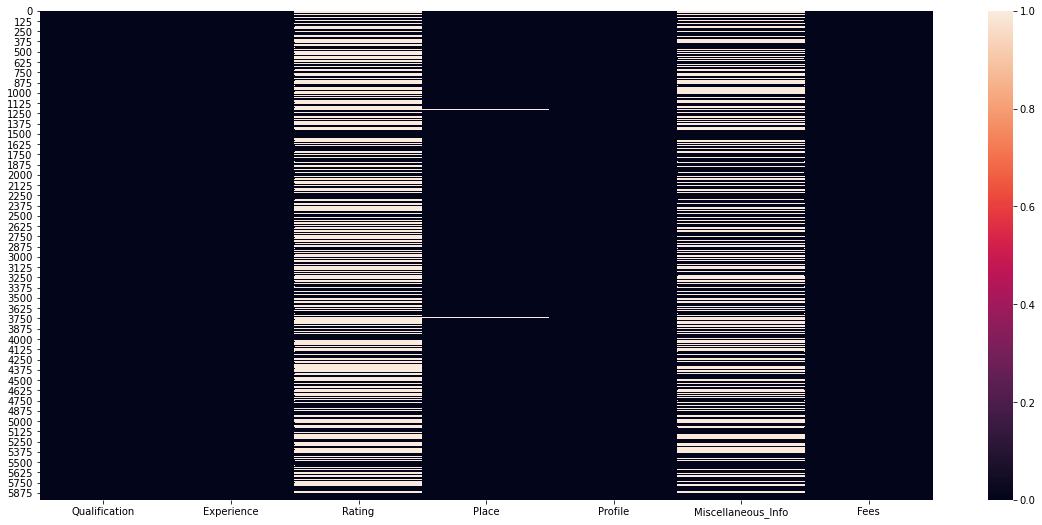

In [7]:
plt.figure(figsize=[20,9])
sns.heatmap(df1.isnull())
plt.show()

Rating, place and miscellaneous info have null values in them.

In [8]:
df1.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Minimum fee is 5 and maximum fee is 950
Describe function is not able to provide details for each column as the data is not in the presentable format.
We will solve this issue in further steps.

Experience column has string data, cannot be accpted by ML model.
We will convert it into integer data type by converting its values.

In [9]:
# Extracting only experience Year from Experience column and converting it to Numeric.
df1['Experience'] = df1['Experience'].str.split().str[0]
df1['Experience'] = df1['Experience'].astype(int)

In [10]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [11]:
#Creating a new column qualification count to see how many qualification each doctor have
df1['Qualification_count']=df1['Qualification'].apply(lambda x: len(x.split(",")))

df1['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [12]:
df1['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

There are a number of Qualifications but most of doctors only has 1 or 2 qualification. 

In order to make our Machine learning train better, we will just target the most frequent 10 Qualifications.

In [13]:
# creating dict of qualification with there counts
df1["Qualification"]=df1["Qualification"].str.split(',')
Qualification ={}
for x in df1["Qualification"].values:
    for i in x:
        i=i.strip()
        if i in Qualification:
            Qualification[i]+=1
        else:
            Qualification[i]=1

In [14]:
#Extracting top 10 qualification
qual10=sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final=[]
for j in qual10:
    final.append(j[0])
    
print(final)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [15]:
#Encoding extracted top 10 qualification into the dataset as new columns.

for qual in final:
    df1[qual]=0

for x,y in zip(df1['Qualification'].values, np.array([i for i in range(len(df1))])):
    for c in x:
        c=c.strip()
        if c in final:
            df1[c][y]=1

In [16]:
df1.head(3)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualification_count,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2,1,0,0,0,0,0,0,0,0,0


In [17]:
# Now we can drop the qualification and qualification count columns 
df1.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [18]:
df1.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0


In [19]:
#As, there are missing values in Place column so we will replace them with Unknown, Unknown(locality,city) to represent them. So that we can easily extract city and locality from Place variable.
df1.Place.fillna('Unknown,Unknown',inplace=True)

#Separating locality and city in individual columns.
df1['locality']=df1['Place'].str.split(",").str[0]
df1['city']=df1['Place'].str.split(",").str[1]

In [20]:
#Now we can drop the place variable
df1.drop('Place',axis=1,inplace=True)

In [21]:
#Dropping the locality column
df1.drop('locality',axis=1,inplace=True)

we have dropped "locality" column as we already have city column which works as same.

It will help in training our ML model in ease way.

In [22]:
df1.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city
0,24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,NaN,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,Chennai


In [23]:
# Filling the missing values in rating column with -99% to provide them different importance.
df1['Rating'].fillna('-1%',inplace=True)

In [24]:
# extracting value of rating to avoid '%' and converting it to numeric
df1['Rating']=df1['Rating'].str.slice(stop=-1).astype(int)

In [25]:
#Creating bins for ratings
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df1['Rating']=pd.cut(df1['Rating'], bins=bins, labels=labels, include_lowest=True)

In [26]:
#Checking the counts of the bins created
df1['Rating'].value_counts()

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
3        0
2        0
Name: Rating, dtype: int64

In [27]:
#Checking city counts
df1['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

In [28]:
#Checking null values in city column
df1["city"].isnull().sum()

1

In [29]:
#filling it with the most frequent value
df1['city'].fillna(df1['city'].mode()[0],inplace=True)

In [30]:
#now checking the null value again
df1["city"].isnull().sum()

0

In [31]:
df1.drop("Miscellaneous_Info",axis=1,inplace=True)

In [32]:
df1.head()

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city
0,24,10,Homeopath,100,0,0,0,1,0,0,0,0,0,1,Ernakulam
1,12,10,Ayurveda,350,0,0,1,0,0,0,0,0,0,0,Bangalore
2,9,0,ENT Specialist,300,1,0,0,0,0,0,0,0,0,0,Bangalore
3,12,0,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Bangalore
4,20,10,Ayurveda,250,0,0,1,0,0,0,0,0,0,0,Chennai


# Data Visualization

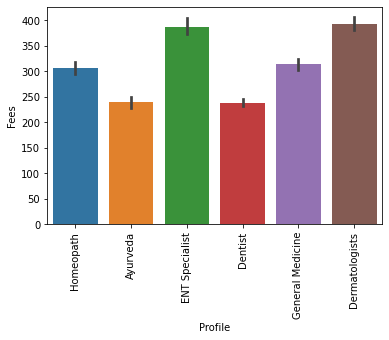

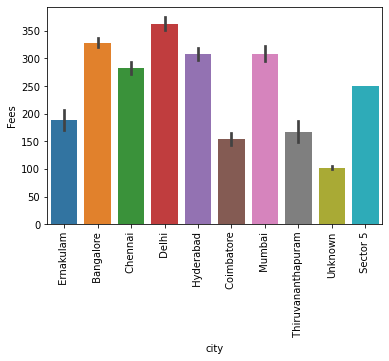

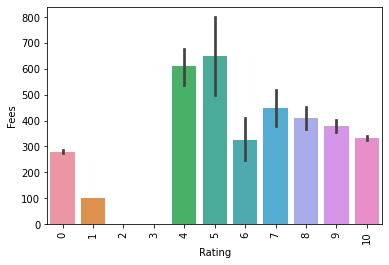

In [33]:
for i in ['Profile','city','Rating']:
    sns.barplot(x=i,y='Fees',data=df1)
    plt.xticks(rotation=90)
    plt.show()

Observations:

ENT Specialist and Dermatologist have the high fee than others.

Fees are high in Delhi,Banglore,mumbai and hyderabad.

Doctos having rating of 4 and 5 have more fees.

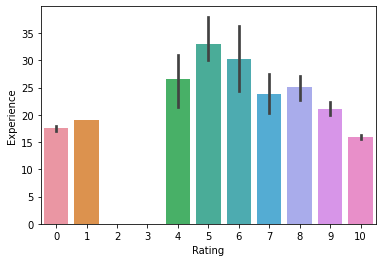

In [34]:
#Experience vs rating
sns.barplot(x='Rating',y='Experience',data=df1)
plt.show()

Most experienced doctors have rating of 5 and 6 (40% to 60%).

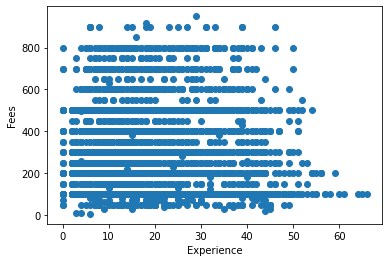

In [35]:
#Experience vs fees
plt.figure()
plt.scatter(x="Experience",y="Fees",data=df1)
plt.xlabel("Experience")
plt.ylabel("Fees")
plt.show()

Doctors with experience of approx 30 years have high fees.

In [36]:
df1.dtypes

Experience                                 int32
Rating                                  category
Profile                                   object
Fees                                       int64
MBBS                                       int64
BDS                                        int64
BAMS                                       int64
BHMS                                       int64
MD - Dermatology                           int64
MS - ENT                                   int64
Venereology & Leprosy                      int64
MD - General Medicine                      int64
Diploma in Otorhinolaryngology (DLO)       int64
MD - Homeopathy                            int64
city                                      object
dtype: object

In [37]:
#Converting rating to int
df1['Rating']=df1['Rating'].astype(int)

In [38]:
cat=["Profile","city"]

In [39]:
#Converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    df1[i]=le.fit_transform(df1[i])

df1.head()


,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,city
0,24,10,5,100,0,0,0,1,0,0,0,0,0,1,4
1,12,10,0,350,0,0,1,0,0,0,0,0,0,0,0
2,9,0,3,300,1,0,0,0,0,0,0,0,0,0,0
3,12,0,0,250,0,0,1,0,0,0,0,0,0,0,0
4,20,10,0,250,0,0,1,0,0,0,0,0,0,0,1


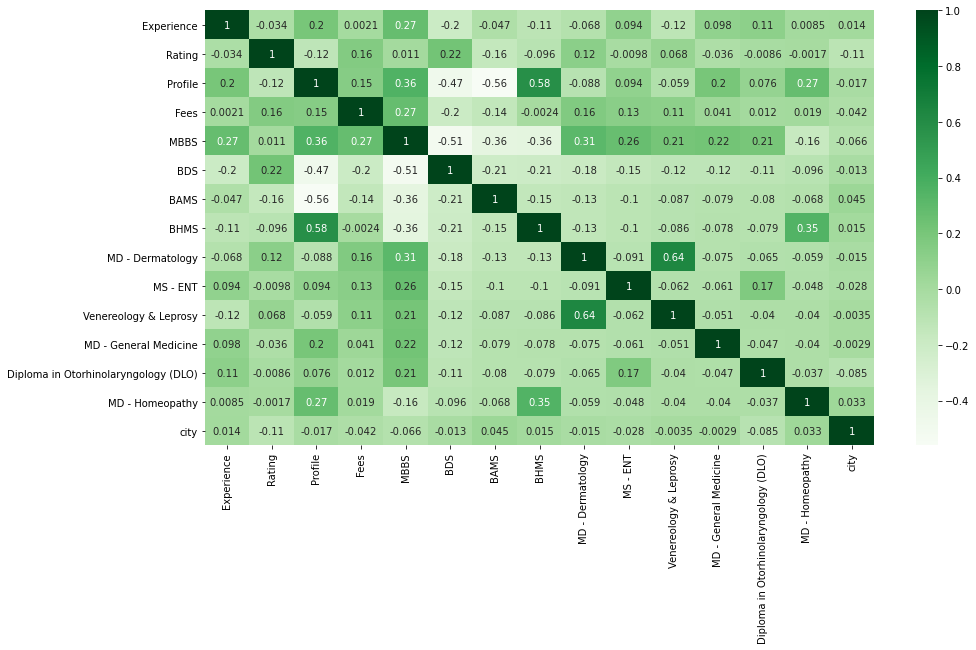

In [40]:
#Checking correlation
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap="Greens")
plt.show()


There is no strong correlation between target variable and independent variable.

As all the columns are of categorical type therefore we will not go for checking outliers and skewness.

## Splitting into X and Y

In [41]:
#Separating target and independent variables
x=df1.drop('Fees',axis=1)
y=df1['Fees']

In [42]:
x.shape,y.shape

((5961, 14), (5961,))

In [44]:
#Scaling the data into standard format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_sc=sc.fit_transform(x)
df1_sc=pd.DataFrame(df1_sc,columns=x.columns)

In [45]:
x=df1_sc

# Finding the best random state:

In [65]:
#Choosing the best random state for our ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu," on Random State ",maxRS)

Best Accuracy is  0.1611330286634688  on Random State  108


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=108)

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

In [74]:
ls=Lasso()
rd=Ridge()
svr=SVR()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()

In [75]:
models=[lr,ls,rd,svr,knn,rf,ada]

for i in models:
    print('\n')
    print(i)
    i.fit(x_train,y_train)
    predict=i.predict(x_train)
    acc=r2_score(y_train,predict)
    print("Accuracy Score of",i," Regressor: ",acc)



LinearRegression()
Accuracy Score of LinearRegression()  Regressor:  0.12008666703906545


Lasso()
Accuracy Score of Lasso()  Regressor:  0.1183773068500984


Ridge()
Accuracy Score of Ridge()  Regressor:  0.12008660135077853


SVR()
Accuracy Score of SVR()  Regressor:  0.054251923269518665


KNeighborsRegressor()
Accuracy Score of KNeighborsRegressor()  Regressor:  0.34489320309712934


RandomForestRegressor()
Accuracy Score of RandomForestRegressor()  Regressor:  0.6503535290574238


AdaBoostRegressor()
Accuracy Score of AdaBoostRegressor()  Regressor:  0.0963024630834054


Random forest regressor is performing good than other models with r2 score of 64.97% but it might be due to overfiiting or underfiiting.

For confirmation we will cross verify it with cross validation score of each model.

# Cross Validation Score

In [76]:
#Cross validation

for i in models:
    cv_score=cross_val_score(i,x,y,cv=5)
    cv_mean=cv_score.mean()
    print("Cross Validation Score for",i,"model: ",cv_mean)

Cross Validation Score for LinearRegression() model:  0.1274036336643193
Cross Validation Score for Lasso() model:  0.12637929300244727
Cross Validation Score for Ridge() model:  0.1274078533499181
Cross Validation Score for SVR() model:  0.07153943243274649
Cross Validation Score for KNeighborsRegressor() model:  0.029654025096686222
Cross Validation Score for RandomForestRegressor() model:  0.00027726041019990875
Cross Validation Score for AdaBoostRegressor() model:  0.11254397184541239


Comparing the Scores of the respective Machine lwarning models and cross validation scores, we came to the conclusion as Random Forest Regressor is the best MAchine Learning model as it has the least diffrence between the respective scores.

# Hyper Paramter tuning

In [77]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators":[50,100, 300, 500]}

GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'n_estimators': 500}

In [78]:
best_mod=RandomForestRegressor(n_estimators=500)

best_mod.fit(x_train,y_train)
pred=best_mod.predict(x_train)
print("Best Accuracy Score: ",r2_score(y_train,pred)*100)

Best Accuracy Score:  65.23072235369159


# Saving the trained model

In [79]:
#Saving our model
import joblib
joblib.dump(best_mod,'Doctor_fees_train.obj')

['Doctor_fees_train.obj']

# Importing the testing dataset

In [81]:
#importing Test data
df1_test=pd.read_csv('Doctor_Final_Test.csv')

In [82]:
df1_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [83]:
df1_test.shape

(1987, 6)

We have 1987 rows and 6 columns

In [84]:
#columns name
df1_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [86]:
#Checking data type
df1_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [87]:
df1_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [88]:
#Creating a new column qualification count to see how many qualification each doctor have
df1_test['Qualification_count']=df1_test['Qualification'].apply(lambda x: len(x.split(",")))

df1_test['Qualification_count'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_count, dtype: int64

In [89]:
df1_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [90]:
# creating dict of qualification with there counts
df1_test["Qualification"]=df1_test["Qualification"].str.split(",")
Qualification ={}
for x in df1_test["Qualification"].values:
    for i in x:
        i=i.strip()
        if i in Qualification:
            Qualification[i]+=1
        else:
            Qualification[i]=1

In [91]:
#Extracting top 10 qualification
qual10=sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final=[]
for j in qual10:
    final.append(j[0])
    
print(final)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [92]:
#Encoding extracted top 10 qualification into the dataset as new columns.
for j in final:
    df1_test[j]=0

for x,y in zip(df1_test['Qualification'].values, np.array([i for i in range(len(df1_test))])):
    for c in x:
        c=c.strip()
        if c in final:
            df1_test[c][y]=1

In [93]:
# Now we can drop the qualification and qualification count columns 
df1_test.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [94]:
# Extracting only experience Year from Experience column and converting it to Numeric.
df1_test['Experience'] = df1_test['Experience'].str.split().str[0]
df1_test['Experience'] = df1_test['Experience'].astype(int)

In [96]:
#As, there are missing values in Place column so we will replace them with Unknown, Unknown(locality,city) to represent them. So that we can easily extract city and locality from Place variable.
df1_test.Place.fillna('Unknown,Unknown',inplace=True)

#Separating locality and city in individual columns.
df1_test['locality']=df1_test['Place'].str.split(",").str[0]
df1_test['city']=df1_test['Place'].str.split(",").str[1]

In [97]:
#Now we can drop the place variable
df1_test.drop('Place',axis=1,inplace=True)

In [98]:
#Dropping the locality column
df1_test.drop('locality',axis=1,inplace=True)

In [99]:
# Filling the missing values in rating column with -99% to provide them different importance.
df1_test['Rating'].fillna('-1%',inplace=True)

In [100]:
# extracting value of rating to avoid '%' and converting it to numeric
df1_test['Rating']=df1_test['Rating'].str.slice(stop=-1).astype(int)

In [101]:
#Creating bins for ratings
bins=[-99,0,10,20,30,40,50,60,70,80,90,100]
labels=[i for i in range(11)]
df1_test['Rating']=pd.cut(df1_test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [102]:
#Checking the bins created
df1_test['Rating'].value_counts()

0     1090
10     739
9      108
8       27
7       14
6        9
5        0
4        0
3        0
2        0
1        0
Name: Rating, dtype: int64

In [103]:
#Checking city counts
df1_test['city'].unique()

array([' Mumbai', ' Hyderabad', ' Chennai', ' Delhi', ' Bangalore',
       ' Coimbatore', ' Thiruvananthapuram', ' Ernakulam', 'Unknown'],
      dtype=object)

In [105]:
df1_test["city"].isnull().sum()

0

In [106]:
# removing the extra spaces before the city
import re
df1_test['city'] = df1_test['city'].apply(lambda x: re.sub(' +','',str(x)))

In [111]:
#Dropping miscellaneous info column e have city column.
df1_test.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [112]:
df1_test.dtypes

Experience                                 int32
Rating                                  category
Profile                                   object
MBBS                                       int64
BDS                                        int64
BHMS                                       int64
BAMS                                       int64
MD - Dermatology                           int64
MS - ENT                                   int64
MD - General Medicine                      int64
Venereology & Leprosy                      int64
Diploma in Otorhinolaryngology (DLO)       int64
DDVL                                       int64
city                                      object
dtype: object

In [113]:
#Converting rating to int
df1_test['Rating']=df1_test['Rating'].astype(int)

In [115]:
for i in cat:
    df1_test[i]=le.fit_transform(df1_test[i])

df1_test.head()

,Experience,Rating,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,city
0,35,0,4,1,0,0,0,0,0,0,0,0,0,6
1,31,0,3,1,0,0,0,0,0,0,0,1,0,5
2,40,7,2,1,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,3
4,16,10,1,0,1,0,0,0,0,0,0,0,0,0


In [116]:
df1_test_sc=sc.fit_transform(df1_test)
df1_test_sc=pd.DataFrame(df1_test_sc,columns=df1_test.columns)

In [117]:
df_test=df1_test_sc

# Loading the Model

In [121]:
#Loading the model
doctor_fee_model=joblib.load('Doctor_fees_train.obj')

In [122]:
#Predicitng the fees(values)
x=doctor_fee_model.predict(df1_test)

In [123]:
print("Predcited values: ",x)

Predcited values:  [285.6        285.6        136.22857143 ... 130.2        331.90666667
 130.2       ]


In [124]:
#creating dataframe to store the predcited values
df=pd.DataFrame(x)

In [125]:
df

,0
0,285.600000
1,285.600000
2,136.228571
3,245.806667
4,331.906667
...,...
1982,416.913333
1983,131.200000
1984,130.200000
1985,331.906667


Saving the predicted values to CSV file

In [126]:
#Saving the predicted values to CSV file
df.to_csv('Doctore_Fee_result.csv', index=False)